## Using Message Passing Attention Graph Neural Networks for Document Classification

#### Names: Meghna Patel & Serazam Monira

####  Emails: meghna.patel@ryerson.ca & serazam.monira@ryerson.ca

# 1.0 Introduction

### 1.1 Problem Description

Use of statistical and deep learning methods for text/document classification are seen across multiple industries. However, little to no research demonstrates the benefits of non-traditional classifiers such as Graph Neural Networks (GNN) over current approaches. 


### 1.2 Context of the Problem

Document classification is the task of assigning a document to one or more categories based on its content. Understanding the challenge to classify large amounts of documents manually, document classification using machine learning techniques becomes of interest. Many state-of-the-art classification models are proposed for this problem, including Naïve Bayes, Support Vector Machines (SVM), Decision Trees, Random Forest & Neural Networks. Though these baseline models result in acceptable performance, studies indicate other lesser explored techniques to outperform these baseline models.

### 1.3 Limitation About other Approaches

Modeling data as graphs has resulted in success across multiple domains including bioinformatics, social media & image recognition [1]. However, only a handful of studies have focused on application of GNN to NLP tasks [2]. Probabilistic and deep learning approaches effectively perform text classification. However, exploiting graphical representation of text leads to better results than traditional word embedding and automatic feature extractions methods [3]. The underlying efficiency of graphs is attributed to its ability to understand the global corpus. 


### 1.4 Solution

The following research explores GNN models for document classification. GNN are capable of handling large complex structures and retaining global information [4]. This research proposes Message Passing GNN for document understanding. This is a replication study based on the paper Message Passing Attention Networks for Document Understanding [2].


# 2.0 Background

|Reference|Explanation|Dataset/Input|Weakness|
|:-|:-|:-|:-|
|S Sinha et al. [3]|The research used a Graph Convolutional Network (GCN) for text classification.|20NG, Ohsumed23 & MR|Achieved a max accuracy of only 70%|
|Y Zhang et al. [7]|This paper proposed TextING, an inductive text classification approach using GNN. In this approach each text got its own structural graph.|Ohsumed23, R52, R8 & MR| Performance decreased as the number of layers increased (i.e. more neighbors were considered)|
|Gilmer et al. [8]|They proposed a message passing framework that can be applied to GNN for predicting quantum properties of organic molecules.|QM9|They recommended adding an attention mechanism to generalise the approach to larger graph.|
|Peng et al. [9]|The research combines graphs and convolutional neural networks (CNN) to exploit advantages of both models for text classification.|RCV1 & NYTimes|There are no notable weaknesses. However, the researchers do see an opportunity to improve their model for complex text structures.|
|Yao et al. [5]|The researchers built a single undirected graph for the dataset, containing word and document nodes. They adopted a semi-supervised node classification approach for classification and compared results to baseline models including CNN, LSTM, etc. |20NG, Ohsumed23, R52, R8 & MR|They recommend using an attention mechanism and unsupervised framework for large unlabeled data.|
|Zhang et al. [10]|The researchers explain that previous applications of GNN to text classification are not scalable to large corpuses and ignore heterogeneity of the text graph. To overcome these issues, the study proposes a transformer based GNN called Text Graph Transformer. The model is compared to Text GNN, Text GCN and other RNNs|R8, R52, Ohsumed, IMDB & Yelp 2014|In most situations Text Graph Transformer models outperform baseline models, however a decline is accuracy is seen when embeddings are initialized randomly|

# 3.0 Methodology

The following section details the methodology used for this project as adopted from the research Message Passing Attention Networks for Document Understand. In the original paper, the authors extend the vanilla model to include hierarchical variants. For this study, the scope is limited to the vanilla model for document classification.  This section explains the message passing framework and the experiments conducted.

### 3.1 Build a Graph Representation of Text

The following section explains the process to generate graph representations of text. In order to apply GNN for document classification it is important to represent documents as graphs. This is done by representing a document as a word co-occurrence networks with a sliding window of two overspanning sentences. In this study we represent documents as directed, weighted graphs [2]. Let us denote a graph by G = (V, E), where V is the node set and E is the edge set. G is represented as: 

**Nodes**: Each unique word in the document is a node in G. 

**Edges**: A natural way to build graphs representations for text is word co-occurrence. An edge is added between a pair of nodes if the nodes (words) are found together in at least one instantiation of the window spanning two sentences.

**Direction**: In our representation, the direction of each edge captures text flow.

**Weights**: Weights assigned to each edge captures the number of co-occurrences.

**Master Node**: The master node is a special document node [1] that connects to all other nodes in the graph through unit weight bi-directional edges. 


                                        Figure 1: Graph representation of a document [2]
<div>
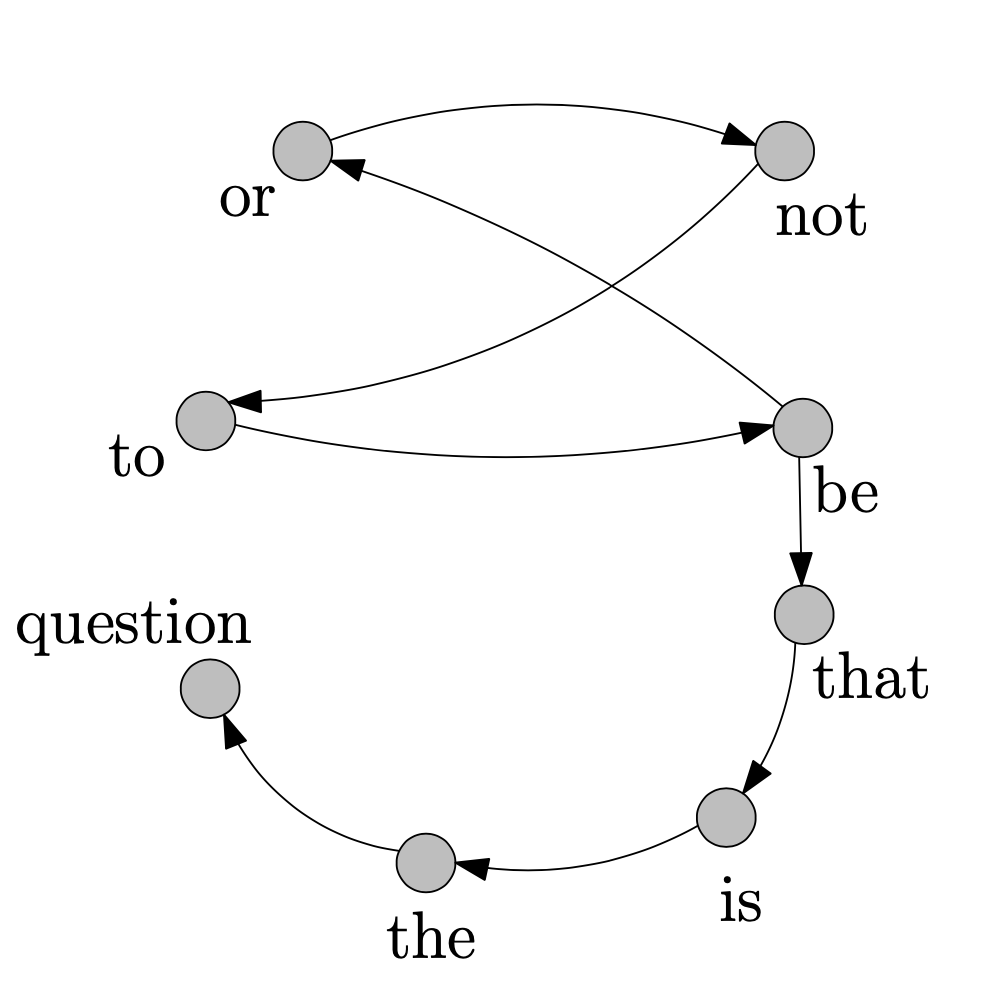
</div>

In order to process the graphs using programming languages, graph representations of each document are defined by an adjacency matrix (A). An adjacency matrix is a 2-dimensional matrix of size N x N, where N is equal to the number of nodes (vertices) in the graph. In a directed graph, the adjacency matrix can be asymmetric. In our matrix representation of each document, a non-zero element Aij indicates a weighted edge from node i to node j. 

                      Figure 2: Graph representation of a document and its corresponding adjacency matrix 

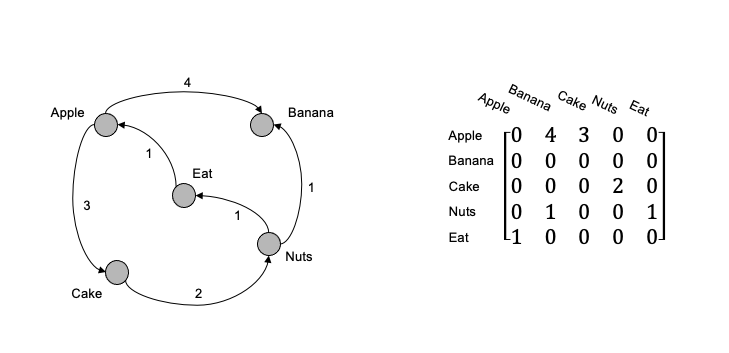

### 3.2 Message Passing & Readout Phase
The following section explains the message passing algorithm. The application of message passing (MP) on graphs is proposed by Gilmer [8]. MP in GNN is done in two main phases; aggregation phase and combine (update) phase [2]. In a MP framework, embeddings corresponding to each node in the graph are updated based on information aggregated from its neighbourhood [2]. The aggregate and update functions are arbitrary functions. The updated embedding, for each node, is then computed by combining the current feature vector with the message vector.

Messages are passed for T time steps (or T iterations). After the first iteration (T = 1), each node embedding stores information about its immediate neighbours. At T = 2, the second iteration, each node embedding contains information from its 2-hop neighbourhood [12]. In this manner, at T = k, each node embedding will contain information from its k-hop neighbours (i.e., information about all neighbours in subtree of height k). 

**Aggregation Phase**
At time T = 1, the message matrix for each node is computed based on information from its neighbours. The aggregate function used for this project is as follows [2]: 

$${M}^{(t+1)}={MLP}^{(t+1)}({D}^{(-1)}A{H}^{(t)})$$

**H** is the state embedding (node feature), an s-dimensional vector of node v. H is updated at each iteration to include information about its neighbours. In order to initialise H, we used 300-dimensional pre-trained Google News vectors made publicly available by Google [14].

**A** is the adjacency matrix representation of the graph G as described in section 3.1. 

**D** is the diagonal in-degree (incoming edges of a node) matrix of the graph G. 

**MLP** denotes a multi-layer perceptron (MLP). MLP is used as the aggregate functon in our MP framework.

**M** is the message matrix that will be used to update the state embedding of each node.

                           Figure 3: Visual representation of the aggregation phase on a single node. Node 
                           A aggregates messages from its  neighbours, that in turn aggregate messages from 
                           their respective neighbours [12].
<div>                           
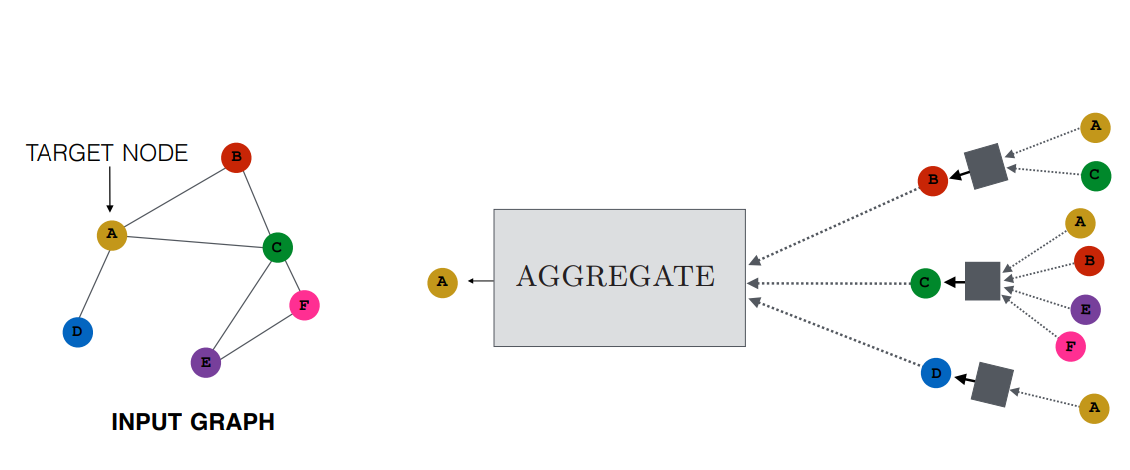
</div>

**Combine (Update) Phase**
The updated embedding is then built by combining the current feature vector with the message vector for each node. This process can be represented mathematically as follows [2]:  

$${H}^{(t+1)}={GRU}^{(k)}({H}^{(t)},{M}^{(t+1)})$$

In the equation it can be seen that Grated Recurrent Unit is choosen as the combine (update) function for this research. The motivation behind using GRU is that enables nodes embeddings to encode both local and global signals [2]. 

**Readout** In order to build a vector representation for the whole graph for classification it is necessary to apply a readout function [13]. The goal of a readout function is to aggregate the computed hidden vertex representation of all nodes into a single graph level representation. The readout function can be a simple function such as sum or mean, or it can be rigorous [13]. In this research, our readout function applies global self-attention to the final node representation matrix [2]. Self-attention mechanism is used for the purpose of assigning weights to neighbors, to reduce noise and achieve better classification accuracy [13]. 

To obtain our final embedding, a master node is integrated into the representation, similar to the approach taken in the paper The Graph Neural Network Model [1]. The purpose of the master node is to store global information about the document such as vocabulary. This is achieved by omitting the master node in the readout phase [2]. 

We can model the final graph representation as follows [2]:

$${H}^{graph}={CONCATENATE}(READOUT({H}^{t}),{H}^{master node})$$

### 3.3 Datasets
The quality of document embeddings learned by the model are measured using 3 document classification datasets. In this section we describe the datasets used for our experiments. The original paper measured the quality of the GNN model on 10 classification datasets, namely, Reuters, BBCSport, RT-Polarity, Subjectivity, MPQA, IMDB, TREC, SST-1, SST-2 and Yelp2013. For the purpose of this replica study we used two datasets directly from the original paper (RT-Polarity and Subjectivity) and introduced a third dataset (BBC) not used in the original paper. 

|Dataset Name|Data Description|No. of Training Samples|No. of Test Samples|No. of Classes|
|:-|:-|:-|:-|:-|
|RT-Polarity [15]|RT-Polarity is a preprocessed dataset containing 5331 positive and 5331 negative movie reviews from Rotten Tomatoes|10,662|10-fold cross-validation|2|
|Subjectivity [16]|Subjectivity is a preprocessed dataset containing movie review snippets from Rotten Tomatoes & IMDB plot summaries |10,000|10-fold cross-validation|2|
|BBC [17]|BBC is a dataset containing labeled new articles from BBC news website from 2004-2005|2,225|10-fold cross-validation|5|

### 3.4 Experimental Setup



                          Figure 4: Visual representation of the experimental process.
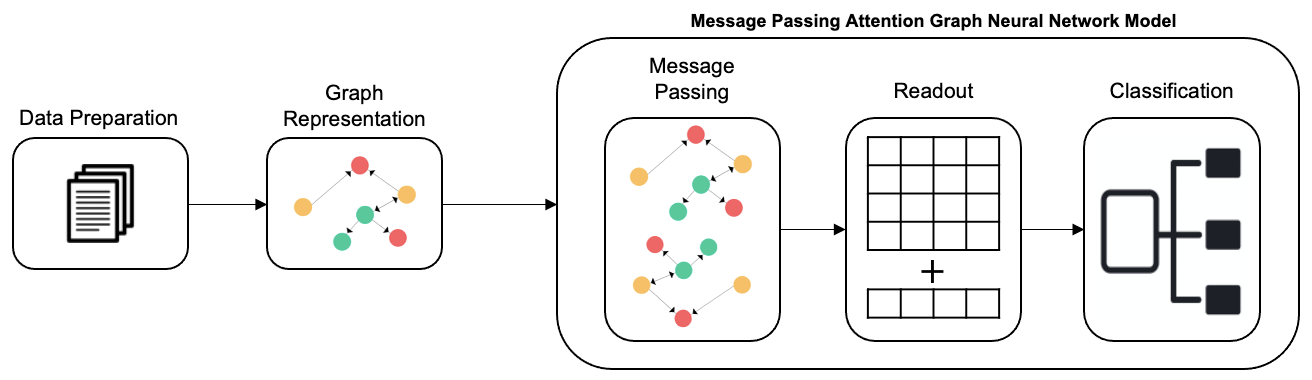

**Preliminary Steps**

The research began with data preparation. Data preparation is the process of cleaning and preparing the data for analysis. Each dataset is passed through a series of steps to prepare it for further analysis. Preparatory steps include (1) eliminating special characters, punctuations and leading (or trailing) white spaces, (2) changing characters to lower case, (3) tokenizing documents into words and (4) encoding labels to numeric values.

Following data preparation, a graph representation is created for each document. Each document, in its graph representation is defined by an adjacency matrix as described in section 3.1. In addition to building the adjacency matrix for each document, node embeddings (features) are also learned. For the purpose of this research, publicly available word2vec vectors trained on 100 billion words from Google News are used to initialize node vectors [14]. If a word is not present in the pre-trained embeddings, its vector representation is initialized randomly. This procedure is handled by the load_embeddings method in the utils.py file. In this manner, our input to the GNN model can be regarded as a graph of vectors [2].

**Components of Message Passing Attention Graph Neural Network Model**

Recall, in a MP framework, messages are passed for T time steps. In this research, T = 2 is selected and each step is implemented using a different layer of the MP framework. In this manner we learn embeddings vectors of nodes based on properties of their neighborhood nodes [5]. Recall, multi-layer perceptron and gated recurrent unit are chosen as the aggregate and combine functions respectively. Following MP, we apply the readout function. Recall, the readout function applies self-attention to the output of the MP phase (excluding the master node). The output of the readout function is then concatenated with the embeddings of the master node in order to build a global representation of the graph.

The global representation is then passed through a dense layer before reaching the classification stage. All dense layers use ReLU activation. For the classification layer, softmax activation is used. 

The message passing attention graph neural network model is trained by minimizing the cross-entropy loss function. For the purpose of training and testing the model, 10-fold cross validation (CV) is used. Further, at each fold, 10% of the training set is randomly sampled to build the validation set [2].

The GNN model is evaluated on three classification datasets described in section 3.3. The mean (average) test set classification accuracy is determined and results are compared against baseline models.

**Baseline Models**

The GNN model is evaluated against state-of-the-art baseline models; Long Short-Term Memory (LSTM) and Feed Forward Neural Network (FFNN). Both models are initialized using pre-trained Google News embeddings [14]. The models are trained using the same datasets as the GNN (RT-Polarity, Subjectivity, BBC) using 10-fold CV. At each fold, 10% of the data is used for defining the validation set. In this manner the mean accuracy for each dataset is obtained. The implementation for the LSTM and FFNN models, in Python, can be found in Baseline_Model_LSTM.ipynb and Baseline_Model_FeedForward.ipynb respectively. 

# Implementation

The following section provides the implementation of the GNN written Python language. Since this is a replica project, the code for this project was adopted from the original paper. 
As discussed in section 3.4, the GNN was compared against two state-of-the-art baseline models; LSTM and FFNN. The code for both these models was not included in the original paper. Our implementation of LSTM and FFNN models can be found in the files Baseline_Model_LSTM.ipynb and Baseline_Model_FeedForward.ipynb within the src folder in our GitHub repository.

In [1]:
# We start by installing the required packages 
# conda install -c pytorch pytorch
# conda install smart_open==2.0.0
# conda install -c anaconda gensim
#!unzip GoogleNews-vectors-negative300.bin.zip 

Import required libraries. Implementation for helper functions used by the GNN are included in .py files outside this notebook. These functions are imported into this notebook here. 

In [10]:
%%capture
# import libraries 
import time
import argparse
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from math import ceil

import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.optim.lr_scheduler import StepLR

import smart_open
smart_open.open = smart_open.smart_open

import numpy as np
import scipy.sparse as sp
import re
from math import ceil
from scipy.sparse import csr_matrix, lil_matrix
import torch
from gensim.models.keyedvectors import KeyedVectors

# load helper functions defined in .py files
from src.utils import load_file, preprocessing, get_vocab, load_embeddings, create_gows, accuracy, generate_batches, AverageMeter
from src.models import MPAD

This is the main function. This function takes a set of arguments (args) as input as outputs the mean classification accuracy for a given dataset. 
The main components of this function include: 
1. Reading the dataset & class labels and preparing the data as explained in section 3.4
2. Building the embedding matrix using Google News Embeddings 
3. Building the adjacency matrix for each document, and corresponding node embeddings (features)
4. Training the model using 10-fold CV
5. Returning the mean test set accuracy

The model is trained in an end-to-end manners by minimizing the cross entropy loss function. Adam is selected as the optimization algorithm with an initial learning rate of 0.001. A dropout rate of 0.5 is used in order to prevent overfitting. The maximum number of epoches is set to 200, and the best epoch (model) is used at each CV iteration. Once CV is complete, the mean test set accuracy is returned. 

In [14]:
def main(args):
    # read & prepare (clean) the data 
    docs, class_labels = load_file(args['path_to_dataset']) # get documents and labels
    docs = preprocessing(docs) # clean/prepare the documents 

    # encode labels
    enc = LabelEncoder()
    class_labels = enc.fit_transform(class_labels)

    nclass = np.unique(class_labels).size # get number of labels (classes)
    y = list()
    for i in range(len(class_labels)):
        t = np.zeros(1)
        t[0] = class_labels[i] # store each class label in an array object
        y.append(t) # append array object to list y

    vocab = get_vocab(docs) # get list of unique words in our document collection
    embeddings = load_embeddings(args['path_to_embeddings'], vocab) # build embedding matrix

    # the following line of code builds the adjacency matrix and node features using the dataset 
    adj, features, _ = create_gows(docs, vocab, args['window_size'], args['directed'], 
                                   args['normalize'], args['use_master_node'])

    kf = KFold(n_splits=10, shuffle=True) # 10 fold cross validation
    it = 0
    accs = list()

    # 10 fold cross validation starts 
    for train_index, test_index in kf.split(y): # generate indices to split data into training and test set.
        it += 1

        # build validation set from the training set 
        idx = np.random.permutation(train_index)
        train_index = idx[:int(idx.size*0.9)].tolist()
        val_index = idx[int(idx.size*0.9):].tolist()

        # get length of training, validation and test sets 
        n_train = len(train_index)
        n_val = len(val_index)
        n_test = len(test_index)

        adj_train = [adj[i] for i in train_index] # get adjacency matrix for training documents
        features_train = [features[i] for i in train_index] # get features for training documents
        y_train = [y[i] for i in train_index] # get labels for training documents

        # we do the same as above, but for the validation set
        adj_val = [adj[i] for i in val_index]
        features_val = [features[i] for i in val_index]
        y_val = [y[i] for i in val_index]

        # we do the same as above, but for the test set 
        adj_test = [adj[i] for i in test_index]
        features_test = [features[i] for i in test_index]
        y_test = [y[i] for i in test_index]

        
        # we build our batch for forward/backward pass
        adj_train, features_train, batch_n_graphs_train, y_train = generate_batches(adj_train, 
                                                                                    features_train, 
                                                                                    y_train, 
                                                                                    args['batch_size'], 
                                                                                    args['use_master_node'])

        adj_val, features_val, batch_n_graphs_val, y_val = generate_batches(adj_val, 
                                                                            features_val, 
                                                                            y_val, 
                                                                            args['batch_size'], 
                                                                            args['use_master_node'])

        adj_test, features_test, batch_n_graphs_test, y_test = generate_batches(adj_test, 
                                                                                features_test, 
                                                                                y_test, 
                                                                                args['batch_size'], 
                                                                                args['use_master_node'])

        n_train_batches = ceil(n_train/args['batch_size'])
        n_val_batches = ceil(n_val/args['batch_size'])
        n_test_batches = ceil(n_test/args['batch_size'])

        # model and optimizer, initalize the model 
        model = MPAD(embeddings.shape[1], 
                     args['message_passing_layers'], # message passing occurs for 2 time steps
                     args['hidden'], 
                     args['penultimate'], 
                     nclass, 
                     args['dropout'], 
                     embeddings, 
                     args['use_master_node'])

        parameters = filter(lambda p: p.requires_grad, model.parameters())
        optimizer = optim.Adam(parameters, lr=args['lr'])
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

        if args['cuda']:
            model.cuda()
            adj_train = [x.cuda() for x in adj_train]
            features_train = [x.cuda() for x in features_train]
            batch_n_graphs_train = [x.cuda() for x in batch_n_graphs_train]
            y_train = [x.cuda() for x in y_train]
            adj_val = [x.cuda() for x in adj_val]
            features_val = [x.cuda() for x in features_val]
            batch_n_graphs_val = [x.cuda() for x in batch_n_graphs_val]
            y_val = [x.cuda() for x in y_val]
            adj_test = [x.cuda() for x in adj_test]
            features_test = [x.cuda() for x in features_test]
            batch_n_graphs_test = [x.cuda() for x in batch_n_graphs_test]
            y_test = [x.cuda() for x in y_test]

        def train(epoch, adj, features, batch_n_graphs, y):
            optimizer.zero_grad()
            output = model(features, adj, batch_n_graphs)
            loss_train = F.cross_entropy(output, y)
            loss_train.backward()
            optimizer.step()
            return output, loss_train

        def test(adj, features, batch_n_graphs, y):
            output = model(features, adj, batch_n_graphs)
            loss_test = F.cross_entropy(output, y)
            return output, loss_test

        best_acc = 0
        
        # epoches 
        for epoch in range(args['epochs']):
            scheduler.step()

            start = time.time()
            model.train()
            train_loss = AverageMeter()
            train_acc = AverageMeter()

            # Train for one epoch
            for i in range(n_train_batches):
                output, loss = train(epoch, adj_train[i], features_train[i], batch_n_graphs_train[i], y_train[i])
                train_loss.update(loss.item(), output.size(0))
                train_acc.update(accuracy(output.data, y_train[i].data), output.size(0))

            # Evaluate on validation set
            model.eval()
            val_loss = AverageMeter()
            val_acc = AverageMeter()

            for i in range(n_val_batches):
                output, loss = test(adj_val[i], features_val[i], batch_n_graphs_val[i], y_val[i])
                val_loss.update(loss.item(), output.size(0))
                val_acc.update(accuracy(output.data, y_val[i].data), output.size(0))

            # Print results
            #print("Cross-val iter:", '%02d' % it, "epoch:", '%03d' % (epoch + 1), "train_loss=", "{:.5f}".format(train_loss.avg),
            #    "train_acc=", "{:.5f}".format(train_acc.avg), "val_loss=", "{:.5f}".format(val_loss.avg),
            #    "val_acc=", "{:.5f}".format(val_acc.avg), "time=", "{:.5f}".format(time.time() - start))

            # Remember best accuracy and save checkpoint
            is_best = val_acc.avg >= best_acc
            best_acc = max(val_acc.avg, best_acc)
            if is_best:
                early_stopping_counter = 0
                torch.save({
                    'epoch': epoch + 1,
                    'state_dict': model.state_dict(),
                    'optimizer' : optimizer.state_dict(),
                }, 'model_best.pth.tar')
            else:
                early_stopping_counter += 1
                #print("EarlyStopping: %i / %i" % (early_stopping_counter, args['patience']))
                if early_stopping_counter == args['patience']:
                    #print("EarlyStopping: Stop training")
                    break

        #print("Optimization finished!")

        # Testing
        test_loss = AverageMeter()
        test_acc = AverageMeter()
        #print("Loading checkpoint!")
        checkpoint = torch.load('model_best.pth.tar') # load best epoch saved at checkpoint
        epoch = checkpoint['epoch']
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])

        for i in range(n_test_batches):
            output, loss = test(adj_test[i], features_test[i], batch_n_graphs_test[i], y_test[i])
            test_loss.update(loss.item(), output.size(0))
            test_acc.update(accuracy(output.data, y_test[i].data), output.size(0))
        accs.append(test_acc.avg.cpu().numpy()) # save accuracy in an array

        # Print results
        print("Cross-val iter:", '%02d' % it, "test_loss=", "{:.5f}".format(test_loss.avg), "test_acc=", "{:.5f}".format(test_acc.avg))
        print()
        
    # print final mean accuracy on the test set 
    print("Average accuracy on test set using graph model: ", "{:.5f}".format(np.mean(accs)))
    return np.mean(accs)

#### Run model on datasets

In the following section, the GNN is trained using the 3 datasets; subjectivity, BBC and rt-polarity. The final mean accuracy is shown for each dataset. 

##### Subjectivity dataset

In [15]:
# define arguments to be fed to the main function 
args_sub = {
    'path_to_dataset': 'C:/Users/Meghna Patel/Documents/GitHub/DS8008_NLP_PROJECT_GNN/data/subjectivity.txt',
    'path_to_embeddings': 'GoogleNews-vectors-negative300.bin',
    'no_cuda': False,
    'epochs': int(200),
    'lr': float(0.001),
    'hidden': int(64),
    'penultimate': int(64),
    'message_passing_layers': int(2),
    'window_size': int(2),
    'directed': True,
    'use_master_node': True,
    'normalize': True,
    'dropout': float(0.5),
    'batch_size': int(128),
    'patience': int(20)
}
args_sub['cuda'] = not args_sub['no_cuda'] and torch.cuda.is_available()

In [16]:
acc_sub = main(args_sub)

Vocabulary size:  21322
Existing vectors: 17913
Cross-val iter: 01 test_loss= 0.25664 test_acc= 0.92600

Cross-val iter: 02 test_loss= 0.18055 test_acc= 0.94100

Cross-val iter: 03 test_loss= 0.24452 test_acc= 0.94400

Cross-val iter: 04 test_loss= 0.18672 test_acc= 0.92200

Cross-val iter: 05 test_loss= 0.28565 test_acc= 0.92700

Cross-val iter: 06 test_loss= 0.26470 test_acc= 0.93100

Cross-val iter: 07 test_loss= 0.17976 test_acc= 0.94200

Cross-val iter: 08 test_loss= 0.19131 test_acc= 0.93100

Cross-val iter: 09 test_loss= 0.34000 test_acc= 0.93100

Cross-val iter: 10 test_loss= 0.19155 test_acc= 0.93500

Average accuracy on test set using graph model:  0.93300


In [17]:
print('Average accuracy using GNN on the subjectivity dataset is: ', np.round(acc_sub*100,2), '%')

Average accuracy using GNN on the subjectivity dataset is:  93.3 %


##### BBC dataset

In [21]:
# define arguments to be fed to the main function 
args_bbc = {
    'path_to_dataset': 'C:/Users/Meghna Patel/Documents/GitHub/DS8008_NLP_PROJECT_GNN/data/bbc_text.txt',
    'path_to_embeddings': 'GoogleNews-vectors-negative300.bin',
    'no_cuda': False,
    'epochs': int(200),
    'lr': float(0.001),
    'hidden': int(64),
    'penultimate': int(64),
    'message_passing_layers': int(2),
    'window_size': int(2),
    'directed': True,
    'use_master_node': True,
    'normalize': True,
    'dropout': float(0.5),
    'batch_size': int(128),
    'patience': int(20)
}
args_bbc['cuda'] = not args_bbc['no_cuda'] and torch.cuda.is_available()

In [22]:
acc_bbc = main(args_bbc)

Vocabulary size:  29463
Existing vectors: 21889
Cross-val iter: 01 test_loss= 0.16668 test_acc= 0.97309

Cross-val iter: 02 test_loss= 0.06787 test_acc= 0.96413

Cross-val iter: 03 test_loss= 0.10146 test_acc= 0.97309

Cross-val iter: 04 test_loss= 0.11963 test_acc= 0.97758

Cross-val iter: 05 test_loss= 0.11889 test_acc= 0.95516

Cross-val iter: 06 test_loss= 0.04517 test_acc= 0.98649

Cross-val iter: 07 test_loss= 0.25602 test_acc= 0.96847

Cross-val iter: 08 test_loss= 0.02002 test_acc= 0.99550

Cross-val iter: 09 test_loss= 0.17501 test_acc= 0.96396

Cross-val iter: 10 test_loss= 0.05856 test_acc= 0.98649

Average accuracy on test set using graph model:  0.97440


In [23]:
print('Average accuracy using GNN on the BBC dataset is: ', np.round(acc_bbc*100,2), '%')

Average accuracy using GNN on the BBC dataset is:  97.44 %


##### rt-polarity dataset

In [18]:
# define arguments to be fed to the main function 
args_rt_pol = {
    'path_to_dataset': 'C:/Users/Meghna Patel/Documents/GitHub/DS8008_NLP_PROJECT_GNN/data/rt-polarity.txt',
    'path_to_embeddings': 'GoogleNews-vectors-negative300.bin',
    'no_cuda': False,
    'epochs': int(200),
    'lr': float(0.001),
    'hidden': int(64),
    'penultimate': int(64),
    'message_passing_layers': int(2),
    'window_size': int(2),
    'directed': True,
    'use_master_node': True,
    'normalize': True,
    'dropout': float(0.5),
    'batch_size': int(128),
    'patience': int(20)
}
args_rt_pol['cuda'] = not args_rt_pol['no_cuda'] and torch.cuda.is_available()

In [19]:
acc_rt_pol = main(args_rt_pol)

Vocabulary size:  18777
Existing vectors: 16416
Cross-val iter: 01 test_loss= 0.40111 test_acc= 0.82381

Cross-val iter: 02 test_loss= 0.51692 test_acc= 0.79944

Cross-val iter: 03 test_loss= 0.42181 test_acc= 0.80488

Cross-val iter: 04 test_loss= 0.40832 test_acc= 0.80300

Cross-val iter: 05 test_loss= 0.42698 test_acc= 0.81332

Cross-val iter: 06 test_loss= 0.43885 test_acc= 0.80863

Cross-val iter: 07 test_loss= 0.45448 test_acc= 0.79174

Cross-val iter: 08 test_loss= 0.40238 test_acc= 0.81520

Cross-val iter: 09 test_loss= 0.42995 test_acc= 0.79831

Cross-val iter: 10 test_loss= 0.43354 test_acc= 0.80206

Average accuracy on test set using graph model:  0.80604


In [20]:
print('Average accuracy using GNN on the rt-polarity dataset is: ', np.round(acc_rt_pol*100,2), '%')

Average accuracy using GNN on the rt-polarity dataset is:  80.6 %


# Results

The following section summarises the experimental results. Results indicate that the GNN outperformed LSTM and Feed Forward Neural Network under most scenarios. 

|Model|Subjectivity|BBC|RT-Polarity|
|:-|:-|:-|:-|
|**GNN**|**93.3 %**|**97.44 %**|80.6 %|
|**Feed Forward Neural Network**|90.37 %|93.05 %|**82.63 %**|
|**LSTM**|87.66 %|91.65 %|79.73%|

# Conclusion and Future Direction
The following paper introduces a message passing attention GNN for document classification. The architecture was evaluated using three datasets; RT-Polarity, Subjectivity and BBC. Results using the GNN are compared to state-of-the-art baseline models, namely LSTM and Feed Forward Neural Network. Experimental results indicate that GNN outperform baseline models in most scenarios (as highlighted in the Results section). This indicates that GNN are indeed competitive models given their ability to understand the global corpus.  Though our GNN model outperformed baseline models, further modifications can lead to better results. Further experiments could include using different MP iterations in order to capture long-range dependencies and using different strategies to build node features (embeddings). Research in this domain suggests that MP along relevant edges can further improve classification results [18]. Such techniques can be used to build meaningful node features for downstream tasks. 

# References:

[1]: Franco Scarselli, Marco Gori, Ah Chung Tsoi, Markus Hagenbuchner & Gabriele Monfardini, The graph neural network model, IEEE Transactions on Neural Networks, 2009, pages 61-80.

[2]: Giannis Nikolentzos, Antoine Tixier & Michalis Vazirgiannis, Message Passing Attention Networks for Document Understanding, The Thirty-Fourth AAAI Conference on Artificial Intelligence (AAAI-20), 2020, pages 8544-8551.

[3]: Sanchit Sinha & Mohit Sudhakar, Using Graph Convolutional Neural Networks for NLP tasks, 2020.

[4]: Yu Zhou, Haixia Zheng & Xin Huang, Graph Neural Networks: Taxonomy, Advances and Trends, 2020.

[5]: Liang Yao, Chengsheng Mao & Yuan Luo, Graph Convolutional Networks for Text Classification, 2018.

[6]: Lianzhe Huang, Dehong Ma, Sujian Li, Xiaodong Zhang & Houfeng Wang, Text Level Graph Neural Network for Text Classification, 2019.

[7]: Yufeng Zhang, Xueli Yu, Zeyu Cui, Shu Wu, Zhongzhen Wen & Liang Wang, Every Document Owns Its Structure: Inductive Text Classification via Graph Neural Networks, 2020.

[8]: Justin Gilmer, Samuel S. Schoenholz, Patrick F. Riley, Oriol Vinyals & George E. Dahl, Neural Message Passing for Quantum Chemistry, 2017.

[9]: Hao Peng, Jianxin Li, Yu He, Yaopeng Liu, Mengjiao Bao & Lihong Wang, Large-Scale Hierarchical Text Classification with Recursively Regularized Deep Graph-CNN, WWW '18: Proceedings of the 2018 World Wide Web Conference, 2018, pages 1063-1072.

[10]: Haopeng Zhang & Jiawei Zhang, Text Graph Transformer for Document Classification, Conference on Empirical Methods in Natural Language Processing, 2020, pages 8322–8327.

[11]: Niloofer Shanavas, Hui Wang, Zhiwei Lin & Glenn Hawe, Knowledge-driven graph similarity for text classification, International Journal of Machine Learning and Cybernetics, 2021, pages 1067–1081. 

[12]: William L. Hamilton, Graph Representation Learning, Synthesis Lectures on Artificial Intelligence and Machine Learning, 2020, volume 14, pages 1-159.

[13]: Jie Zhou, Ganqu Cui, Shengding Hu, Zhengyan Zhang, Cheng Yang, Zhiyuan Liu, Lifeng Wang, Changcheng Li & Maosong Sun, Graph neural networks: A review of methods and applications, AI Open, 2020, Pages 57-81.

[14]: Pre-trained Google News Vectors, https://code.google.com/archive/p/word2vec/

[15]: Bo Pang & Lillian Le, Subjectivity dataset, RT-Polarity, http://www.cs.cornell.edu/people/pabo/movie-review-data/

[16]: Bo Pang & Lillian Le, Subjectivity dataset, 2004, https://www.cs.cornell.edu/people/pabo/movie-review-data/

[17]: BBC dataset, 2006, http://mlg.ucd.ie/datasets/bbc.html

[18]: Julian Busch, Jiaxing & Thomas Seidl, PushNet: Efficient and Adaptive Neural Message Passing, 24th European Conference on Artificial Intelligence - ECAI 2020, 2020